In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

![alt text](FIFA20.png "Title")

# FIFA-20 Dataset

Being a die hard fan of the FIFA series and having bought all of the games since FIFA 09 (except FIFA 19), this dataset really piqued my interest and I thought it'd be a good idea to have a look at it and explore it. 

Let's load the dataset first

## Exploring and cleaning the data

In [2]:
data = pd.read_csv('players_20.csv')
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [3]:
M,N = data.shape
print('Number of players : ', M)
print('Number of features : ', N)

Number of players :  18278
Number of features :  104


The dataset contains quite a number of players and each player has 104 features associated with it.

Let's see what the feature names are and if any of them can be dropped from our analysis.

In [4]:
columns = data.columns
list(columns)

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

In [5]:
drop_columns = ['dob','sofifa_id','player_url','long_name','body_type','real_face','nation_position'
                ,'loaned_from','nation_jersey_number','player_tags','team_jersey_number'
                ,'contract_valid_until','release_clause_eur','player_traits','joined']

data = data.drop(drop_columns, axis = 1)
columns = data.columns

Now, let's see what the datatype of each feature is after the removal of the useless features.

In [6]:
dtypes = data.columns.to_series().groupby(data.dtypes).groups
dtypes = {k.name: v for k, v in dtypes.items()}
dtypes

{'int64': Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
        'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
        'attacking_crossing', 'attacking_finishing',
        'attacking_heading_accuracy', 'attacking_short_passing',
        'attacking_volleys', 'skill_dribbling', 'skill_curve',
        'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
        'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
        'movement_reactions', 'movement_balance', 'power_shot_power',
        'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
        'mentality_aggression', 'mentality_interceptions',
        'mentality_positioning', 'mentality_vision', 'mentality_penalties',
        'mentality_composure', 'defending_marking', 'defending_standing_tackle',
        'defending_sliding_tackle', 'goalkeeping_diving',
        'goalkeeping_handling', 'goalkeeping_kicking',
        'goalkeeping_posit

Let's explore those features which have a datatype of `object` and see if they can be encoded into something more useful.

In [7]:
object_columns = list(dtypes['object'])
data[object_columns]

,short_name,nationality,club,player_positions,preferred_foot,work_rate,team_position,ls,st,rs,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,Argentina,FC Barcelona,"RW, CF, ST",Left,Medium/Low,RW,89+2,89+2,89+2,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,Portugal,Juventus,"ST, LW",Right,High/Low,LW,91+3,91+3,91+3,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,Brazil,Paris Saint-Germain,"LW, CAM",Right,High/Medium,CAM,84+3,84+3,84+3,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,Slovenia,Atlético Madrid,GK,Right,Medium/Medium,GK,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,Belgium,Real Madrid,"LW, CF",Right,High/Medium,LW,83+3,83+3,83+3,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,China PR,Beijing Renhe FC,CB,Right,Medium/High,RES,32+2,32+2,32+2,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,Xiao Mingjie,China PR,Shanghai SIPG FC,CB,Right,Medium/Medium,SUB,33+2,33+2,33+2,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,Zhang Wei,China PR,Hebei China Fortune FC,CM,Right,Low/Medium,SUB,43+2,43+2,43+2,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,Wang Haijian,China PR,Shanghai Greenland Shenhua FC,CM,Right,Low/Low,SUB,43+2,43+2,43+2,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


It looks like the last few columns depict how well a player would do in a position plus some improvement metric. Let's convert it into something useful. Each of the last few columns have values of the form $x+y$. Let's remove the $y$ part of each entry.

In [8]:
positions = object_columns[7:]

In [9]:
for pos in positions:
    data[pos] = data[pos].str.split('+').str[0]

In [10]:
data[positions]

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89,89,89,93,93,93,93,93,93,93,...,68,66,66,66,68,63,52,52,52,63
1,91,91,91,89,90,90,90,89,88,88,...,65,61,61,61,65,61,53,53,53,61
2,84,84,84,90,89,89,89,90,90,90,...,66,61,61,61,66,61,46,46,46,61
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83,83,83,89,88,88,88,89,89,89,...,66,63,63,63,66,61,49,49,49,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,32,32,32,31,31,31,31,31,31,31,...,43,42,42,42,43,45,46,46,46,45
18274,33,33,33,33,32,32,32,33,33,33,...,44,43,43,43,44,46,47,47,47,46
18275,43,43,43,43,43,43,43,43,44,44,...,47,49,49,49,47,47,49,49,49,47
18276,43,43,43,45,44,44,44,45,46,46,...,48,48,48,48,48,48,49,49,49,48


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18278 non-null  object 
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   nationality                 18278 non-null  object 
 5   club                        18278 non-null  object 
 6   overall                     18278 non-null  int64  
 7   potential                   18278 non-null  int64  
 8   value_eur                   18278 non-null  int64  
 9   wage_eur                    18278 non-null  int64  
 10  player_positions            18278 non-null  object 
 11  preferred_foot              18278 non-null  object 
 12  international_reputation    18278 non-null  int64  
 13  weak_foot                   182

- From the above analysis, it looks like there are quite a lot of `null` values in our dataset.

- Upon further inspection, columns 17 to 22 as well as 63 to 88 have $16242$ `non-null` values. And columns 23 to 28 have $2036$ `non-null` values. 

- Having played a lot of FIFA in my lifetime, I know that the features associated with columns 17-22, namely `physic`, `dribbling`, `passing`, `defending`,`shooting` and `pace` are attributes associated only with outfield players. Similarly, columns 23-28, `gk_diving`,`gk_handling`,`gk_positioning`,`gk_reflexes`,`gk_speed`,`gk_kicking` are attributes associated with only goalkeepers.

- It can be conluded that the dataset contains $2306$ goalkeepers and $16242$ outfield players. It's better to separate them because the analysis of outfield players will be very different than of goalkeepers.

In [12]:
player_attributes = ['dribbling','defending','physic','passing','shooting','pace']
gk_attributes = ['gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning']

gk_data = data.loc[~data['gk_diving'].isnull()]
player_data = data.loc[data['gk_diving'].isnull()]

gk_data = gk_data.drop(player_attributes + positions + ['team_position'], axis = 1)
player_data = player_data.drop(gk_attributes, axis = 1)
player_data[positions] = player_data[positions].astype('int')

### Outfield Player Data

In [13]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16242 entries, 0 to 18277
Data columns (total 83 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  16242 non-null  object 
 1   age                         16242 non-null  int64  
 2   height_cm                   16242 non-null  int64  
 3   weight_kg                   16242 non-null  int64  
 4   nationality                 16242 non-null  object 
 5   club                        16242 non-null  object 
 6   overall                     16242 non-null  int64  
 7   potential                   16242 non-null  int64  
 8   value_eur                   16242 non-null  int64  
 9   wage_eur                    16242 non-null  int64  
 10  player_positions            16242 non-null  object 
 11  preferred_foot              16242 non-null  object 
 12  international_reputation    16242 non-null  int64  
 13  weak_foot                   162

We have no `na` values so no imputation is required.

#### Average Player Weight

In [14]:
avg_weight = player_data[['weight_kg']].mean()[0]
print('Average weight of an outfield player : {:.2f} kg'.format(avg_weight))

Average weight of an outfield player : 74.44 kg


#### Average Player Height

In [15]:
avg_height = player_data[['height_cm']].mean()[0]
print('Average height of an outfield player : {:.2f} cm'.format(avg_height))

Average height of an outfield player : 180.48 cm


#### Best Dribblers

In [16]:
player_data.sort_values(by = ['dribbling'], ascending = False)[['short_name','dribbling']].head()

,short_name,dribbling
0,L. Messi,96.0
2,Neymar Jr,95.0
4,E. Hazard,94.0
41,Bernardo Silva,92.0
150,Douglas Costa,91.0


#### Best Passers

In [17]:
player_data.sort_values(by = ['passing'], ascending = False)[['short_name','passing']].head()

,short_name,passing
0,L. Messi,92.0
5,K. De Bruyne,92.0
27,C. Eriksen,90.0
36,T. Kroos,90.0
8,L. Modrić,89.0


#### Most physical players

In [18]:
player_data.sort_values(by = ['physic'], ascending = False)[['short_name','physic']].head()

,short_name,physic
562,M. Marega,90.0
4026,Garrido,89.0
42,Casemiro,89.0
389,M. Sissoko,89.0
600,Wesley,88.0


#### The Most Clinical

In [19]:
player_data.sort_values(by = ['shooting'], ascending = False)[['short_name','shooting']].head()

,short_name,shooting
1,Cristiano Ronaldo,93.0
0,L. Messi,92.0
12,H. Kane,91.0
17,S. Agüero,90.0
205,F. Quagliarella,89.0


#### Best Defenders

In [20]:
player_data.sort_values(by = ['defending'], ascending = False)[['short_name','defending']].head()

,short_name,defending
16,G. Chiellini,90.0
7,V. van Dijk,90.0
11,K. Koulibaly,89.0
35,D. Godín,89.0
49,M. Hummels,89.0


#### Fastest Players

In [21]:
player_data.sort_values(by = ['pace'], ascending = False)[['short_name','pace']].head()

,short_name,pace
2167,Adama Traoré,96.0
10,K. Mbappé,96.0
6495,K. Nagai,95.0
9065,A. Chalá,95.0
55,L. Sané,95.0


#### Strongest Weak Foot

In [22]:
player_data.sort_values(by = ['weak_foot'], ascending = False)[['short_name','weak_foot']].head()

,short_name,weak_foot
1002,Y. Atal,5
5510,C. Jorquera,5
14306,Pedro Augusto,5
12003,Kim Soo Beom,5
1466,D. Zurutuza,5


#### Preferred Foot of Players

In [24]:
foot = player_data['preferred_foot'].value_counts().index
counts = player_data['preferred_foot'].value_counts().values

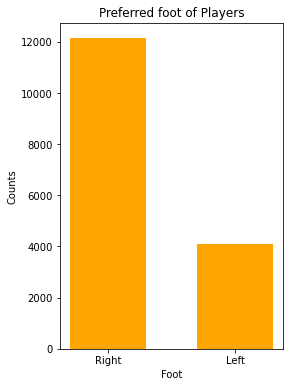

In [25]:
plt.figure(figsize = (4,6))
plt.bar(foot, height = counts,color = 'orange',width = 0.6)
plt.title('Preferred foot of Players')
plt.xlabel('Foot')
plt.ylabel('Counts')
plt.show()

#### Nationality Distribution

In [26]:
top_countries = player_data['nationality'].value_counts().sort_values(ascending = False).index[:10]
counts = player_data['nationality'].value_counts().sort_values(ascending = False).values[:10]

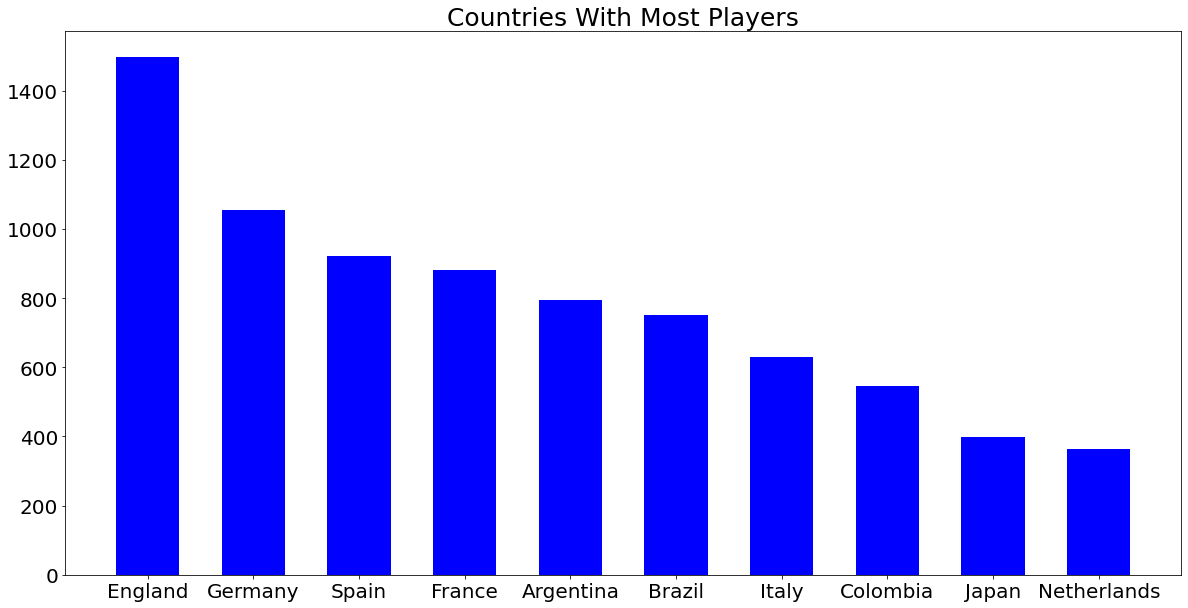

In [27]:
plt.figure(figsize = (20,10))
plt.bar(top_countries, height = counts,color = 'blue',width = 0.6)
plt.title('Countries With Most Players', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

#### Young Players with the Most Potential (Less than 22 years)

In [28]:
young = player_data.loc[player_data.age < 22]
young = young.sort_values(by = ['potential'], ascending = False)
young_top = young[['short_name','potential']].iloc[:10]

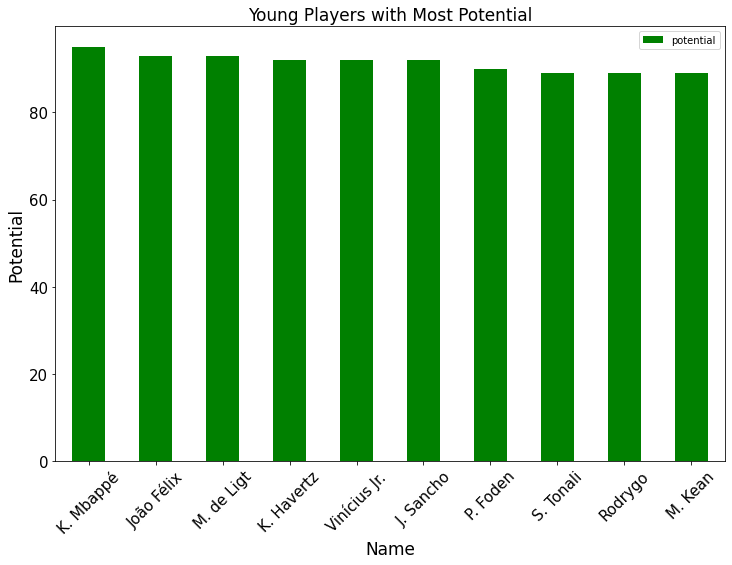

In [29]:
young_top.plot.bar(x = 'short_name', y = 'potential', color = 'green', figsize = (12,8), rot = 45)
plt.title('Young Players with Most Potential',fontsize = 17)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Name', fontsize = 17)
plt.ylabel('Potential',fontsize = 17)
plt.show()

#### Best Old Players (Above 30 years)

In [30]:
old = player_data.loc[player_data.age > 30]
old = old.sort_values(by = ['overall'], ascending = False)
old_top = old[['short_name','overall']].iloc[:10]

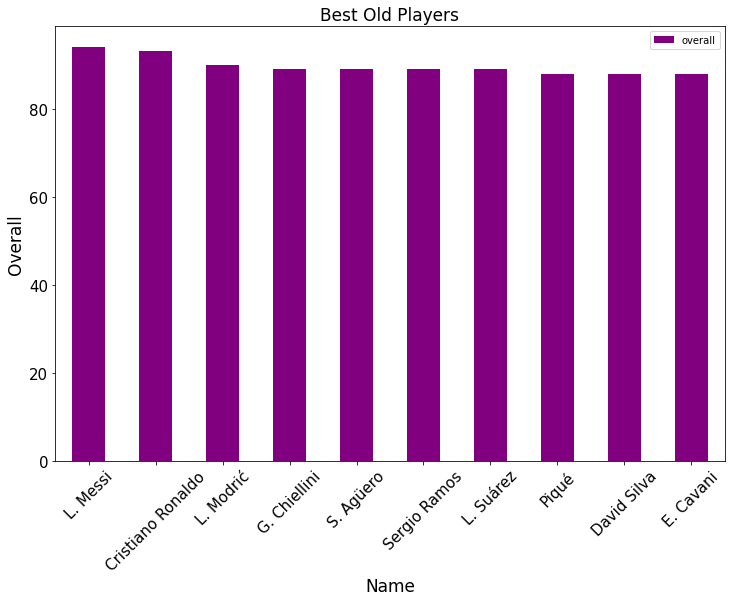

In [31]:
old_top.plot.bar(x = 'short_name', y = 'overall', color = 'purple', figsize = (12,8), rot = 45)
plt.title('Best Old Players',fontsize = 17)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Name', fontsize = 17)
plt.ylabel('Overall',fontsize = 17)
plt.show()

#### Distribution of Skill Move Levels

In [32]:
skill_levels = player_data['skill_moves'].value_counts().index
counts = player_data['skill_moves'].value_counts().values
skill_labels = [str(s) + ' Star' for s in skill_levels]
percentages = np.round(counts*100/np.sum(counts), 2)
percentage_labels = [str(p) + '%' for p in percentages]

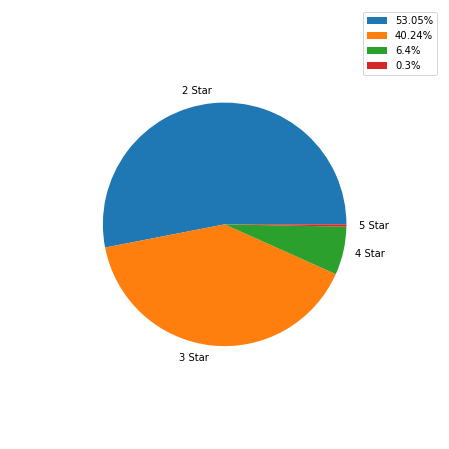

In [33]:
plt.figure(figsize = (8,8))
plt.pie(counts, labels = skill_labels, radius = 0.7)
plt.legend(percentage_labels)
plt.show()

#### Highest Paid Players

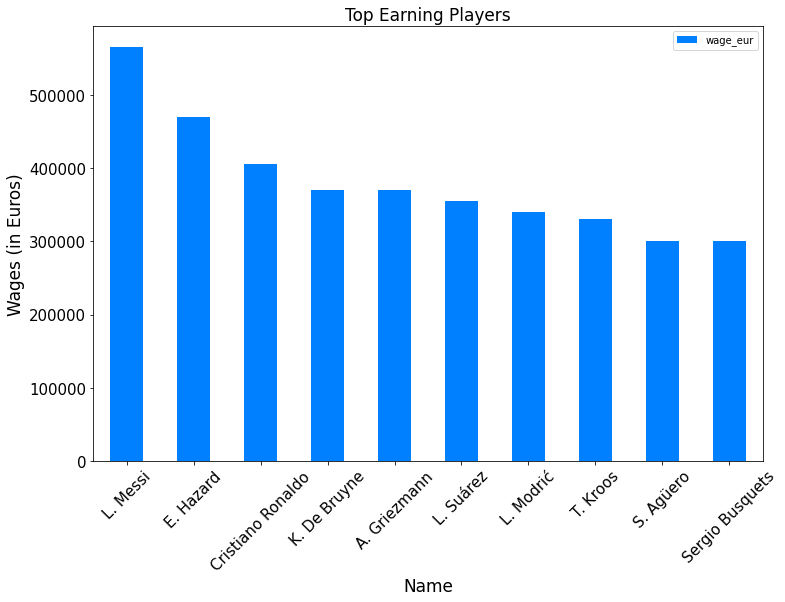

In [50]:
wages = player_data.sort_values(by = ['wage_eur'], ascending = False)[['short_name','wage_eur']][:10]
wages.plot.bar(y = 'wage_eur',x = 'short_name',color = (0,0.5,1),rot = 45, figsize = (12,8))
plt.title('Top Earning Players',fontsize = 17)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Name', fontsize = 17)
plt.ylabel('Wages (in Euros)',fontsize = 17)
plt.show()